In [5]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

In [2]:
df <- read.csv("csv/new_csv/cleaned_data.csv")
head(df)

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_.l.100.km.,ecology_.gCO2.km.,gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,daewoo rezzo,daewoo,2003,200000,89,121,Gasoline,9.0,236,Manual,199,EUR,Germany,0,NA,unknown,unknown,199
2,volkswagen golf,volkswagen,1994,222275,55,75,Gasoline,0.0,0,Manual,200,EUR,Germany,0,NA,unknown,unknown,200
3,ford fiesta,ford,2001,153000,44,60,Gasoline,7.3,171,Manual,290,EUR,Germany,0,NA,unknown,unknown,290
4,volkswagen polo,volkswagen,1999,154000,44,60,Gasoline,6.3,151,Manual,350,EUR,Germany,0,NA,unknown,unknown,350
5,nissan micra,nissan,1998,140000,40,54,Gasoline,6.0,152,Manual,380,EUR,Germany,0,NA,unknown,unknown,380
6,opel omega,opel,1995,186675,85,116,Gasoline,NA,NA,Manual,400,EUR,Germany,0,NA,unknown,unknown,400


In [16]:
names(df)[names(df) == 'ecology_.gCO2.km.'] <- 'ecology'
names(df)[names(df) == 'consumption_.l.100.km.'] <- 'consumption'
colnames(df)

[1] "name"            "mark"            "year"            "mileage"        
 [5] "engine_power_kW" "engine_power_hp" "fuel_type"       "consumption"    
 [9] "ecology"         "gearbox"         "price"           "currency"       
[13] "country"         "engine_size"     "nr_of_accidents" "color_exterior" 
[17] "color_interior"  "price_eur"

In [17]:
summary(df)

     name               mark                year         mileage      
 Length:1700        Length:1700        Min.   :   0   Min.   :     0  
 Class :character   Class :character   1st Qu.:2007   1st Qu.: 44676  
 Mode  :character   Mode  :character   Median :2013   Median : 91199  
                                       Mean   :1935   Mean   :117959  
                                       3rd Qu.:2018   3rd Qu.:178765  
                                       Max.   :2020   Max.   :700000  
                                                                      
 engine_power_kW  engine_power_hp  fuel_type          consumption    
 Min.   : 30.00   Min.   : 41.0   Length:1700        Min.   : 0.000  
 1st Qu.: 55.00   1st Qu.: 75.0   Class :character   1st Qu.: 5.700  
 Median : 74.00   Median :101.0   Mode  :character   Median : 6.400  
 Mean   : 78.85   Mean   :107.3                      Mean   : 6.659  
 3rd Qu.:100.00   3rd Qu.:136.0                      3rd Qu.: 7.500  
 Max.   :176

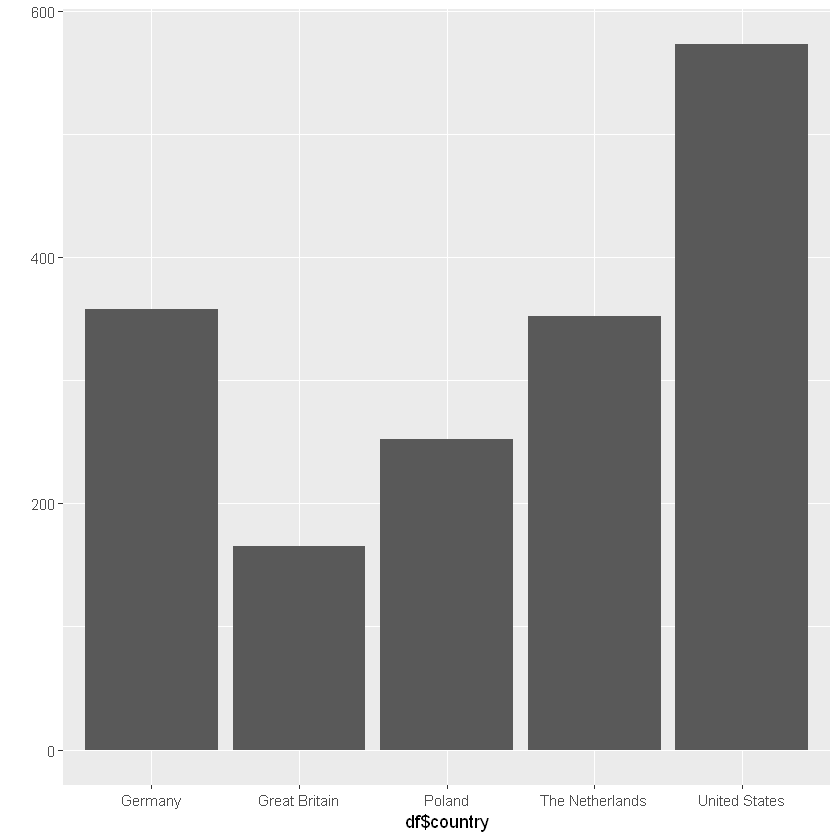

In [18]:
qplot(df$country)

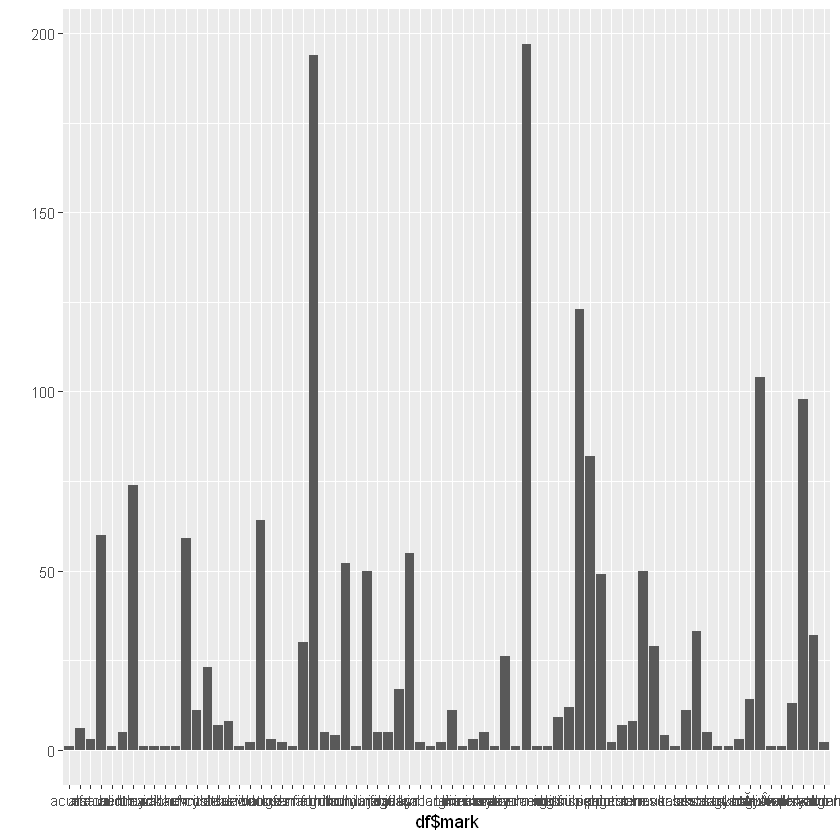

In [19]:
qplot(df$mark)

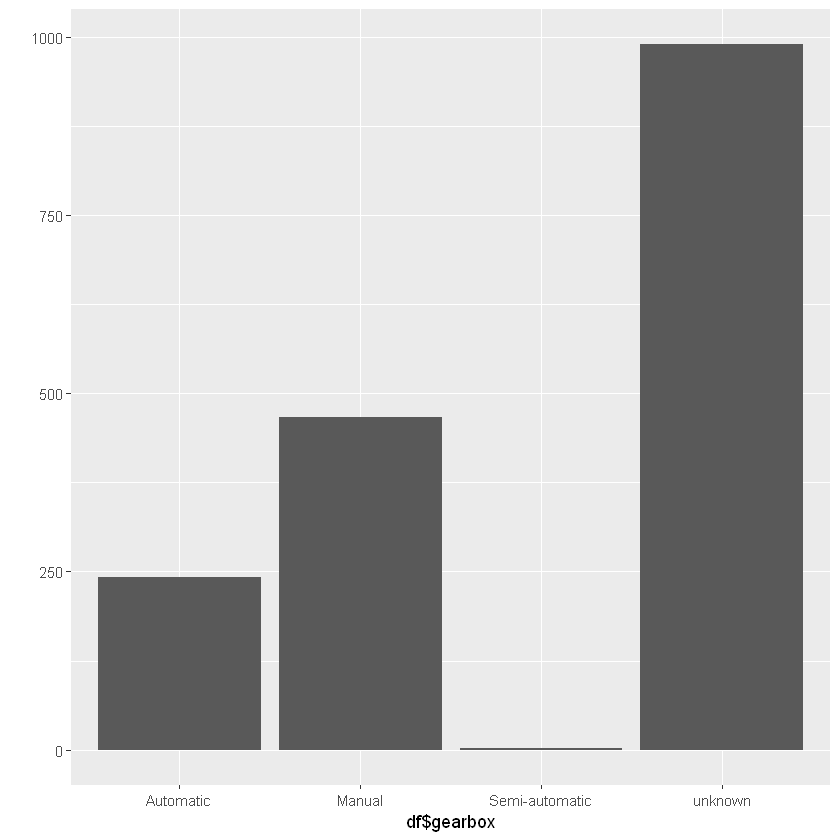

In [20]:
qplot(df$gearbox)

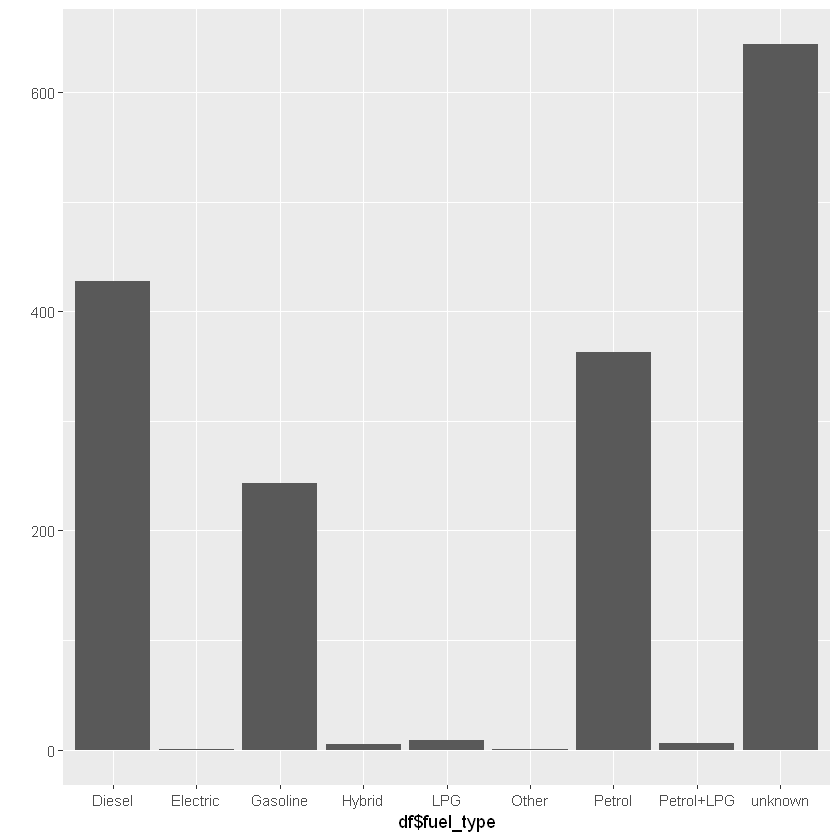

In [21]:
qplot(df$fuel_type)

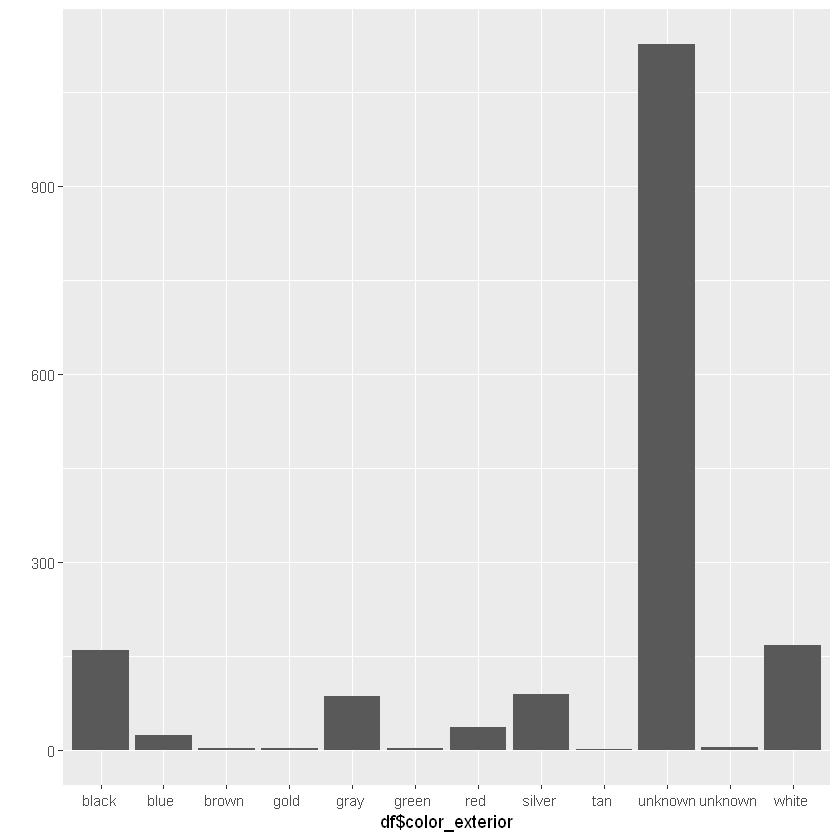

In [22]:
qplot(df$color_exterior)

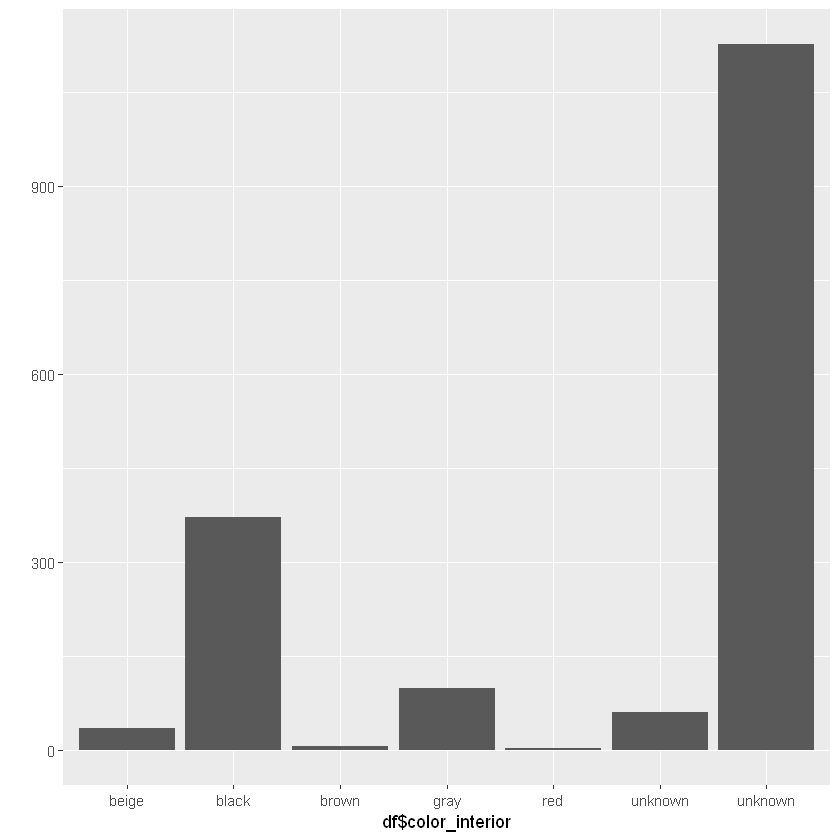

In [23]:
qplot(df$color_interior)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 1127 rows containing non-finite values (stat_bin)."


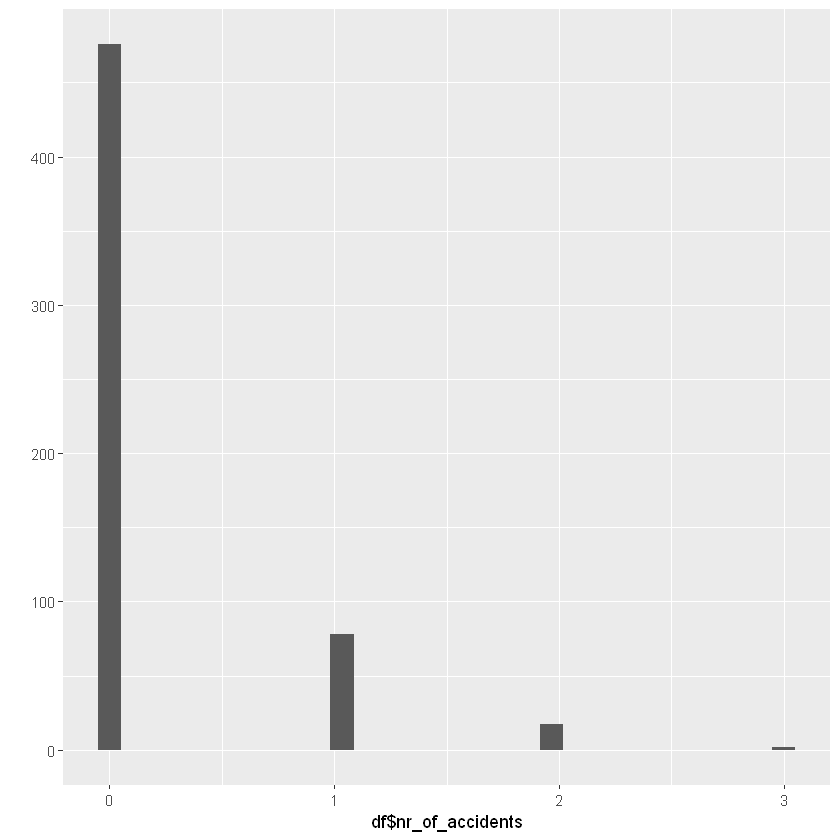

In [24]:
qplot(df$nr_of_accidents)

In [42]:
cormat <- round(cor(df), 2)
head(cormat)

ERROR: Error in cor(df): 'x' must be numeric


The following objects are masked from df (pos = 3):

    color_exterior, color_interior, consumption, country, currency,
    ecology, engine_power_hp, engine_power_kW, engine_size, fuel_type,
    gearbox, mark, mileage, name, nr_of_accidents, price, price_eur,
    year


The following objects are masked from df (pos = 4):

    color_exterior, color_interior, consumption, country, currency,
    ecology, engine_power_hp, engine_power_kW, engine_size, fuel_type,
    gearbox, mark, mileage, name, nr_of_accidents, price, price_eur,
    year


The following objects are masked from df (pos = 5):

    color_exterior, color_interior, consumption, country, currency,
    ecology, engine_power_hp, engine_power_kW, engine_size, fuel_type,
    gearbox, mark, mileage, name, nr_of_accidents, price, price_eur,
    year




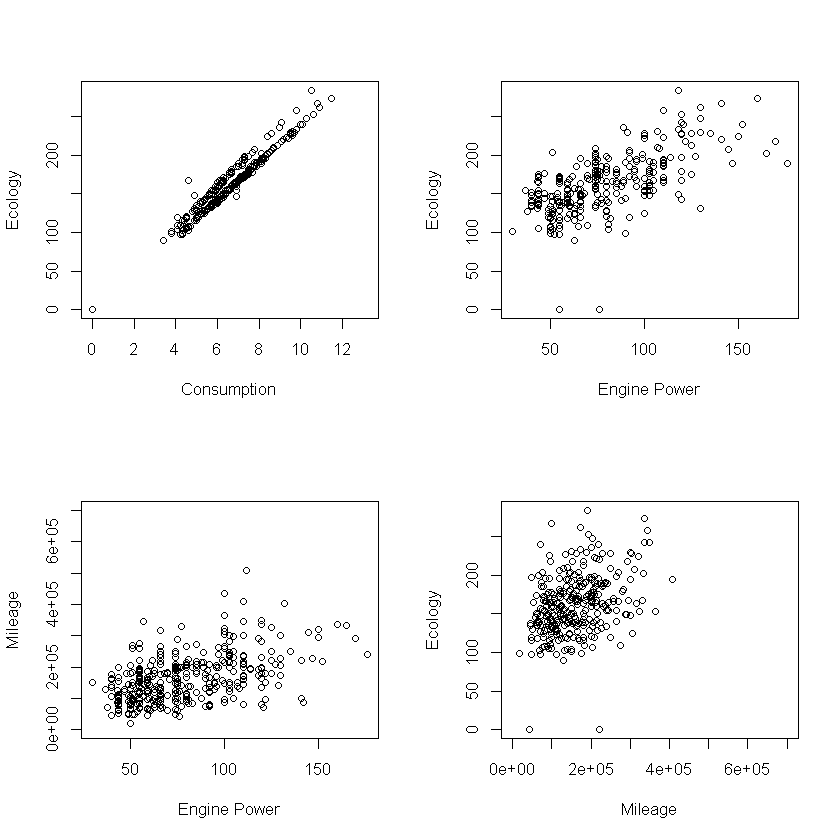

In [38]:
attach(df)
par(mfrow=c(2,2))
plot(x=consumption, y=ecology, xlab="Consumption", ylab="Ecology")
plot(x=engine_power_kW, y=ecology, xlab="Engine Power", ylab="Ecology")
plot(x=engine_power_kW, y=mileage, xlab="Engine Power", ylab="Mileage")
plot(x=mileage, y=ecology, xlab="Mileage", ylab="Ecology")

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 1395 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 1395 rows containing missing values (geom_point)."


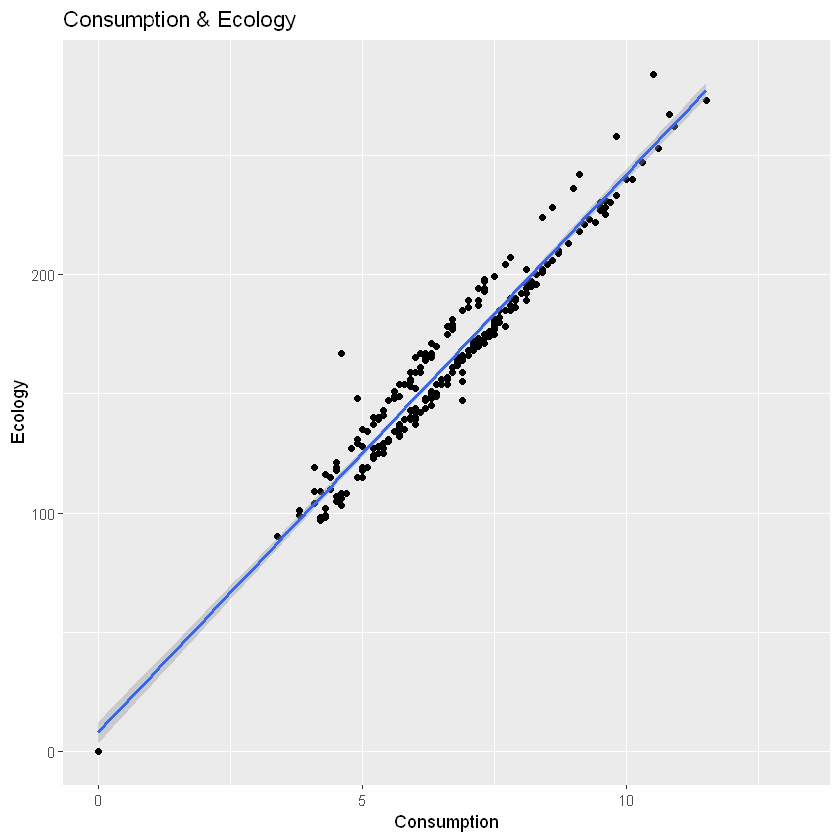

In [28]:
ggplot(data=df, aes(x=consumption, y=ecology)) +
  geom_point() +
  geom_smooth(method='lm') +
  xlab('Consumption') +
  ylab('Ecology') +
  ggtitle('Consumption & Ecology')

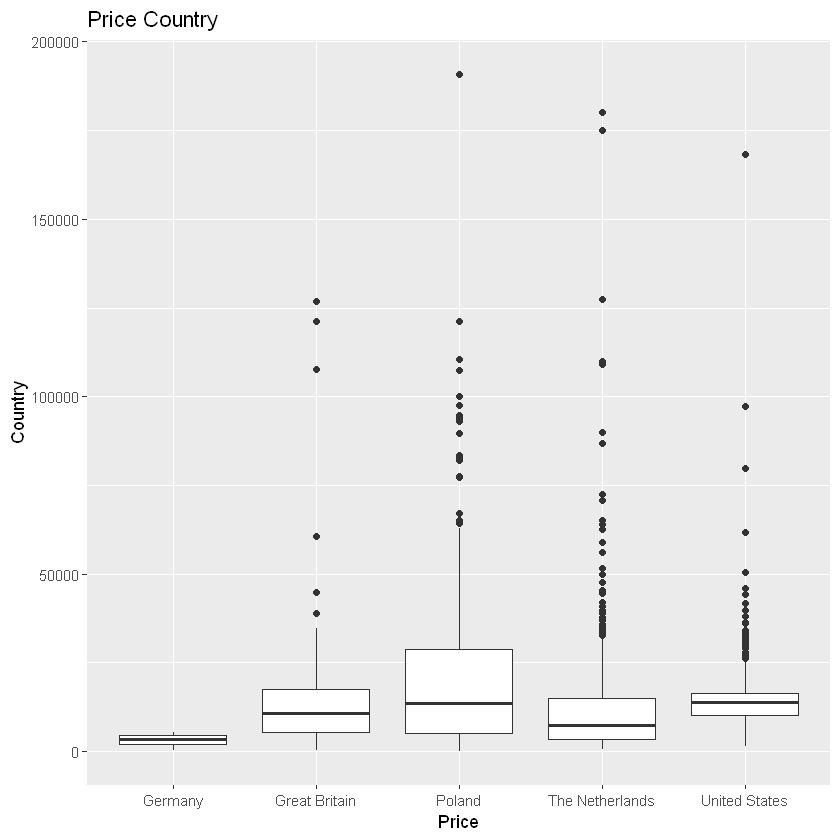

In [33]:
df2 <- df[(df$price_eur < 2e+05),]
ggplot(data = df2, aes(y=price_eur, x=country)) +
  geom_boxplot() +
  xlab('Price') +
  ylab('Country') +
  ggtitle('Price Country')